In [51]:
import sklearn
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [52]:
cancer = datasets.load_breast_cancer()
print(cancer)

{'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
 

In [53]:
X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(cancer.data,cancer.target,random_state=42)

In [54]:
tree = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)

In [55]:
print("Training score:\n{}".format(tree.score(X_train,y_train)))
print("Testing score:\n{}".format(tree.score(X_test,y_test)))

Training score:
1.0
Testing score:
0.9300699300699301


In [56]:
######################## 100% accuracy on training set => Overfitting. 
######################## Pre-Prune the tree using max-depth on the classifier. Atleast better score on test set. 
tree = DecisionTreeClassifier(max_depth=4,random_state=0).fit(X_train,y_train)
print("Pre-Pruned Training score:\n{}".format(tree.score(X_train,y_train)))
print("Pre-Pruned Testing score:\n{}".format(tree.score(X_test,y_test)))

Pre-Pruned Training score:
0.9953051643192489
Pre-Pruned Testing score:
0.951048951048951


In [57]:
export_graphviz(tree,out_file="tree.dot",class_names=['malignant','benign'], feature_names=cancer.feature_names,impurity=False,filled=True)

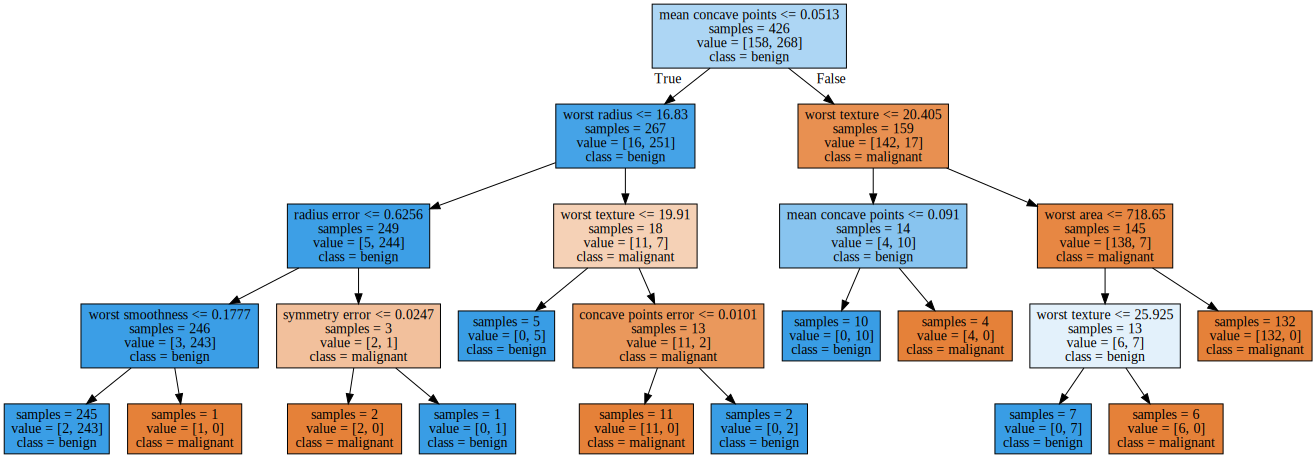

In [58]:
with open('tree.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

In [59]:
########################  FEATURE IMPORTANCE
feature_importances = tree.feature_importances_
print("Feature Importance:\n{}".format(feature_importances))

Feature Importance:
[ 0.          0.          0.          0.          0.          0.          0.
  0.73943775  0.          0.          0.013032    0.          0.          0.
  0.          0.          0.          0.01737208  0.00684355  0.
  0.06019401  0.11783988  0.          0.03522339  0.01005736  0.          0.
  0.          0.          0.        ]


([<matplotlib.axis.YTick at 0x1129b39b0>,
 <a list of 30 Text yticklabel objects>)

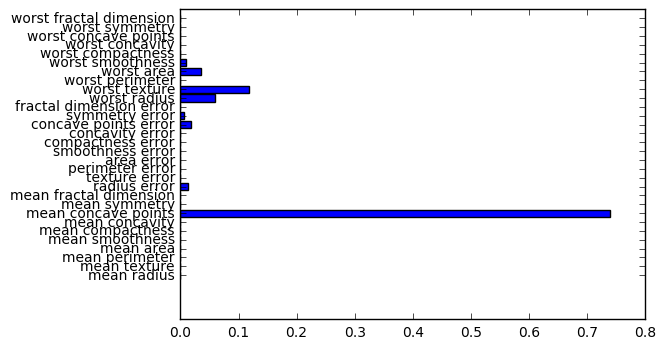

In [60]:
n_features = cancer.feature_names.shape[0]
plt.barh(range(n_features),feature_importances, align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)